<a href="https://colab.research.google.com/github/Asir-IO/digit-classification/blob/main/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
import cv2


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load data and split it to train/test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
#data reshaping and preprocessing
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

x_train= x_train / 255
x_test= x_test / 255

In [7]:
#Convert class labels into one-hot encoded vectors.
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [55]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


In [56]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8654 - loss: 0.4273 - val_accuracy: 0.9600 - val_loss: 0.1299
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9628 - loss: 0.1217 - val_accuracy: 0.9637 - val_loss: 0.1241
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9694 - loss: 0.0987 - val_accuracy: 0.9748 - val_loss: 0.0881
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9774 - loss: 0.0784 - val_accuracy: 0.9748 - val_loss: 0.0881
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9799 - loss: 0.0652 - val_accuracy: 0.9741 - val_loss: 0.0874
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9822 - loss: 0.0548 - val_accuracy: 0.9781 - val_loss: 0.0797
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.9831 - loss: 0.0569 - val_accuracy: 0.9821 - val_loss: 0.0683
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9856 -

In [58]:
#predictions
predicted_classes = np.argmax(model.predict(x_test), axis=1)
true_classes = y_test.argmax(axis=1)
print("Predicted classes:", predicted_classes)
print("True classes:", true_classes)

model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted classes: [7 2 1 ... 4 5 6]
True classes: [7 2 1 ... 4 5 6]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9791 - loss: 0.0824


[0.06827448308467865, 0.9821000099182129]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
predicted num: 0


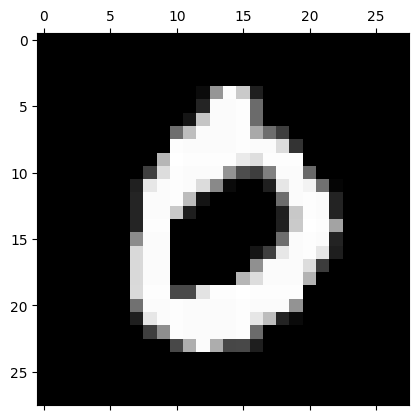

In [59]:
i = 3
plt.matshow(x_test[i].reshape(28, 28), cmap='gray')
y_pred = model.predict(x_test)
print(f"predicted num: {np.argmax(y_pred[i])}")

In [11]:
#accuracy
loss_train, accuracy_train = model.evaluate(x_train, y_train, verbose=0)
loss_test, accuracy_test = model.evaluate(x_test, y_test, verbose=0)

print("Training accuracy:", accuracy_train)
print("Testing accuracy:", accuracy_test)

Training accuracy: 0.9926999807357788
Testing accuracy: 0.9804999828338623


In [41]:
from sklearn.metrics import classification_report

y_test_labels = np.argmax(y_test, axis=1)
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)
print("Classification Report: \n", classification_report(y_test_labels, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.97      0.97      0.97       982
           5       0.99      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.99      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [12]:
model.save('model.keras')

In [29]:
from PIL import Image

In [70]:
def predict(sketchpad_input):
  if isinstance(sketchpad_input,dict):
    img=sketchpad_input["composite"]
  else:
    img=sketchpad_input

  if isinstance(img,np.ndarray):
    img=Image.fromarray(img)

  img=img.convert("L")
  img=img.resize((28,28))

  img_array=np.array(img)
  img_array=img_array / 255.0
  img_array=img_array.reshape(1,784)
  img_array = 1.0 - img_array

  probabilities = model.predict(img_array)[0]
  output = ""
  for i, p in enumerate(probabilities):
    output += f"{i}: {p*100:.2f}% \n"
  output += f"\nIt is (most likely): {np.argmax(probabilities)}"
  return output


In [71]:
import gradio as gr
ui=gr.Interface(fn=predict,inputs=gr.Sketchpad(),outputs="text")

ui.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4416ea781a1cfdee1e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
